In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')


# Q1

In [2]:
df = pd.read_csv('data_dm3.csv',sep=',',header=None)

In [3]:
# On définit les covariables
X = df.iloc[:,:-1]
print('Il y a ' + str(X.shape[0]) + ' observations et ' + str(X.shape[1]) + ' variables explicatives')

# Définition de la variable à expliquer
y = df.iloc[:,-1]

Il y a 442 observations et 210 variables explicatives


# Q2

#### Pour vérifier si les variables sont centrées et normalisées, on calcule moyenne et variance. Si les variables suivent une loi de moyenne nulle, elles sont centrées. Si elles suivent une loi de variance 1, elles sont normalisées

In [4]:
# Moyenne des variables explicatives
print("On a " + str(X.shape[1]) + " variables explicatives. Pour chacune d'elle, on calcule la moyenne. \nPuis on cherche le min et max des  " + str(X.shape[1]) + "  moyennes")

print("  --> La plus petite moyenne parmis les variables explicative est de " + str( np.min(np.mean(X))))
print("  --> La plus petite moyenne parmis les variables explicative est de " + str(np.max(np.mean(X))))
print("      -----> ** Donc les variables explicatives sont centrées **")
print("\n")
# Variance des variables explicatives
print("On fait de même pour la variance")
print("  --> La plus petite variance parmis les variables explicative est de " + str(np.min(np.var(X))))
print("  --> La plus petite variance parmis les variables explicative est de " + str(np.max(np.var(X))))
print("      -----> ** Donc les variables explicatives sont réduites **")
print("\n\n")

print(" ---------->  Les variables explicatives sont normalisées <----------")
print("\n\n")


On a 210 variables explicatives. Pour chacune d'elle, on calcule la moyenne. 
Puis on cherche le min et max des  210  moyennes
  --> La plus petite moyenne parmis les variables explicative est de -1.7231063232870077e-16
  --> La plus petite moyenne parmis les variables explicative est de 5.726942298971396e-17
      -----> ** Donc les variables explicatives sont centrées **


On fait de même pour la variance
  --> La plus petite variance parmis les variables explicative est de 0.9999999999999984
  --> La plus petite variance parmis les variables explicative est de 1.0000000000000018
      -----> ** Donc les variables explicatives sont réduites **



 ---------->  Les variables explicatives sont normalisées <----------





##### Pour la vartiable à expliquer : 

In [5]:
# Moyenne et variance de la variable à expliquer
print("  --> Moyenne de la variable à expliquer " + str( np.mean(y)) + " : Elle n'est pas centrée")
print("  --> Variance de la variable à expliquer " + str(np.var(y)) + " : Elle n'est pas normalisée")


  --> Moyenne de la variable à expliquer 152.13348416289594 : Elle n'est pas centrée
  --> Variance de la variable à expliquer 5929.884896910383 : Elle n'est pas normalisée


In [6]:
## plot de la database avec 4 covariables et la variable à expliquer
X_toplot = X.sample(n=4,axis=1)   # prend 4 colonnes au hasard parmis les 210

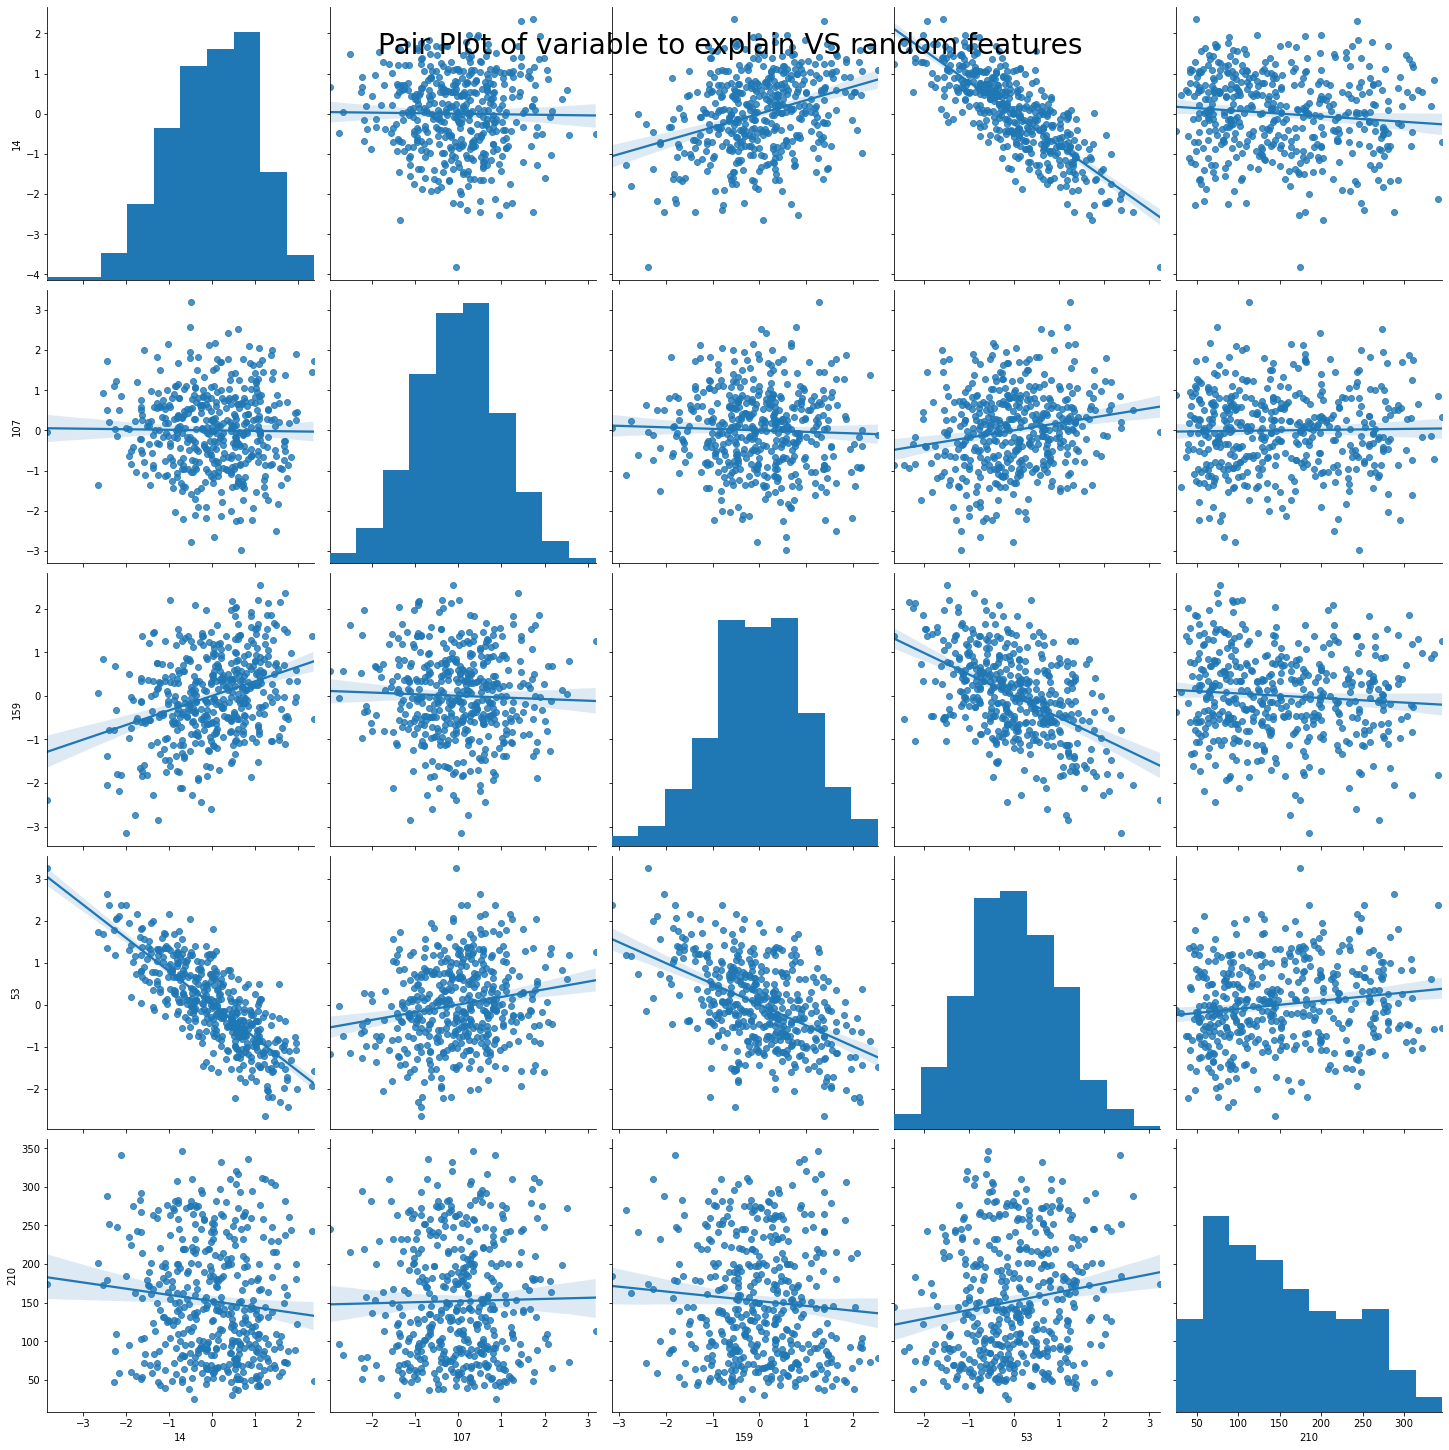

In [7]:
X_toplotY = pd.concat([X_toplot,y],axis=1)

sns.pairplot(X_toplotY, kind='reg',diag_kind='hist',height = 4)
plt.suptitle('Pair Plot of variable to explain VS random features',size=28);


##### Pour l'instant, on ne peut pas dire grand-chose. Il n'y a pas de trend qui se dégage entre une des covariables et la variable à expliquer. Elles peuvent être de vraies covariables mais pas explicatives comme elles peuvent être générées par le robot. 

##### On constate que la distribution des X suit une loi à peu près normale, mais pas Y.

# Q3

In [8]:
Xtrain , Xtest, ytrain , ytest = train_test_split(X,y,test_size=0.25, random_state=42)
# le random state représente l'aléatoire du split. Fixer random_state à une certaine valeur permet de garder toujours le 
# même split quand on run la cellule et de garder ainsi les mêmes résultats pour la suite au fur et à mesure des runs


# Q4

In [9]:
Xtrain_cov = np.cov(Xtrain,rowvar= False)
eigenvalues,eigenvectors = np.linalg.eig(Xtrain_cov)
print('Matrice de covariance de Xtrain : \n' , pd.DataFrame(Xtrain_cov))

Matrice de covariance de Xtrain : 
           0         1         2         3         4         5         6    \
0    1.020813  0.216457  0.062128  0.379775 -0.108393 -0.368020 -0.181496   
1    0.216457  1.011815 -0.691012  0.220846  0.558934 -0.274143 -0.325478   
2    0.062128 -0.691012  0.991414 -0.389203 -0.749065  0.041494 -0.247507   
3    0.379775  0.220846 -0.389203  1.026779  0.390104  0.141448  0.072747   
4   -0.108393  0.558934 -0.749065  0.390104  1.046830  0.269888  0.248447   
..        ...       ...       ...       ...       ...       ...       ...   
205  0.098874  0.125595 -0.035964  0.047447 -0.037656  0.248187 -0.610004   
206 -0.124879  0.048739 -0.180579  0.241600  0.154702 -0.436106  0.414006   
207 -0.186310 -0.100192  0.446509 -0.422138 -0.409974 -0.101470 -0.464392   
208  0.341963  0.444714 -0.086120  0.148681  0.060728 -0.299259 -0.386432   
209  0.112981  0.309039 -0.434905 -0.165907  0.237290 -0.310075  0.079845   

          7         8         9    ... 

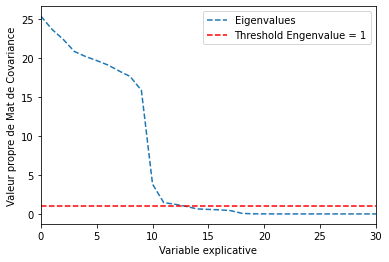

In [10]:

xs = np.linspace(0,210,2000)
horiz_line_data = np.array([1 for i in range(len(xs))])


plt.figure()
plt.plot(sorted(eigenvalues.real,reverse=True),linestyle='dashed',label='Eigenvalues')
plt.plot(xs, horiz_line_data, 'r--',label='Threshold Engenvalue = 1')
plt.xlim(0,30)
plt.xlabel('Variable explicative')
plt.ylabel('Valeur propre de Mat de Covariance')
plt.legend()
plt.show()

Les valeurs propres faibles engendrent un fort risque d'erreur de prédiction. Il faut donc s'en affranchir. On garde k = 10 variables pour une analyse PCA car ces 10 variables sont à valeur propre significative (supérieure à 1). Elles sont donc les composantes principales captant la majorité de la variance du jeu de données et qui donc contiennent l'essentiel de l'information nécessaire à la prédiction des y.

La ligne rouge correspond à valeur propre = 1. Tout ce qui est en dessous n'a que très peu de pouvoir explicatif. C'est pour ça qu'on retient environ 10 features. En d'autres termes, les valeurs propres inférieures à 1 correspondent à des variables explicatives qui n'apportent que très peu de variance au jeu de données et peuvent donc être écartées.

Les composantes de la PCA sont prises en fonction des magnitudes des Valeurs propres car on veut composantes principales

Comme on ne garde que k = 10 variables dans la suite, on prend eigenvectors = eigenvectors[0:10]


In [11]:
print('Comme on ne garde que k = 10 variables dans la suite, on prend eigenvectors = eigenvectors[0:10]')

Comme on ne garde que k = 10 variables dans la suite, on prend eigenvectors = eigenvectors[0:10]


# Q5

### PCA before OLS

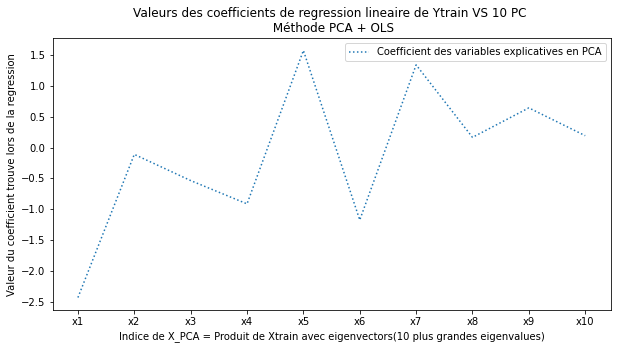

In [12]:
# Centrage et réduction de y pour l'ACP
ytrain_Q5 = (ytrain - np.mean(ytrain))/np.std(ytrain)
Xtrain_Q5 = (Xtrain - np.mean(Xtrain))/np.std(Xtrain)

ACP =  PCA(n_components=10).fit_transform(Xtrain_Q5)

# Creation du modele
X_PCA = sm.add_constant(ACP) # Ajout de la constante à l'ACP
modelPCA_avec_X0 = sm.OLS(ytrain,X_PCA) # X_PCA)
resultsPCA_avec_X0 = modelPCA_avec_X0.fit()

# print(results.summary())
plt.figure(figsize=(10,5))
plt.plot(resultsPCA_avec_X0.params[1:],
         label = 'Coefficient des variables explicatives en PCA',
        linestyle = 'dotted')
plt.xlabel('Indice de X_PCA = Produit de Xtrain avec eigenvectors(10 plus grandes eigenvalues)')
plt.ylabel('Valeur du coefficient trouve lors de la regression')
plt.title('Valeurs des coefficients de regression lineaire de Ytrain VS 10 CP')
plt.title('Valeurs des coefficients de regression lineaire de Ytrain VS 10 PC \n Méthode PCA + OLS')
plt.legend()
plt.show()



### Classic OLS

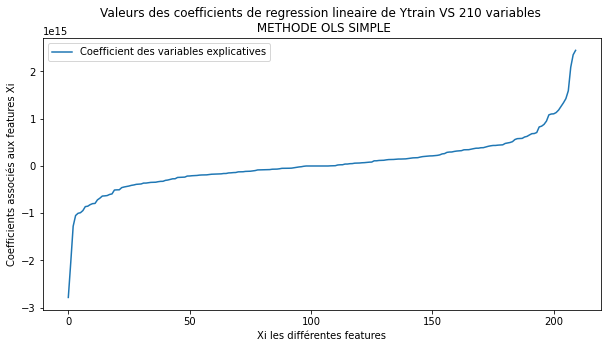

In [13]:
reg = LinearRegression(fit_intercept=True)
results_avec_X0 = reg.fit(Xtrain,ytrain)
plt.figure(figsize=(10,5))
plt.plot(sorted(results_avec_X0.coef_),
         label = 'Coefficient des variables explicatives')
plt.xlabel('Xi les différentes features')
plt.ylabel('Coefficients associés aux features Xi')
plt.title('Valeurs des coefficients de regression lineaire de Ytrain VS 210 variables \n METHODE OLS SIMPLE')
plt.legend()
plt.show()

# Q6

In [14]:
## modele avec intercept
X_PCA_normalized = StandardScaler().fit_transform(X_PCA)
modelPCA_normalized_avec_X0 = sm.OLS(ytrain,X_PCA_normalized)
resultsPCAcentree_avec_X0 = modelPCA_avec_X0.fit()
print("#############################")
print('Intercept de la regression OLS en ayant standardise les inputs de PCA : ' + str("%.2f" % resultsPCAcentree_avec_X0.params[0]))
print('Valeur moyenne de la variable Y (sur le train set) : ' + str("%.2f" % np.mean(ytrain)))
print("#############################")


#############################
Intercept de la regression OLS en ayant standardise les inputs de PCA : 154.34
Valeur moyenne de la variable Y (sur le train set) : 154.34
#############################


Le fait est que l'estimateur des OLS est sans biais. On a donc $\mathbb{E}[Y-\hat{Y}]=0$.

ce qui est équivalent à $\mathbb{E}[Y-\theta_0 - X^\textrm{T}\theta]=0$.

Or $E[X]=0$ pour tout $X$ car on a centré les variables explicatives.

Donc $\mathbb{E}[Y] = \theta_0$ , ce qui signifie que l'espérence de Y (la moyenne) correspond exactement à l'intercept de l'OLS.

# Q7

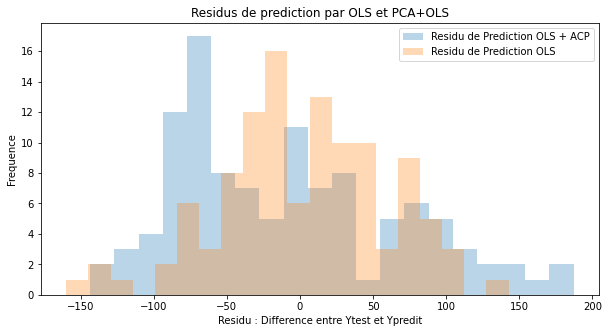

##########################################################################################
RESULTATS POUR OLS SIMPLE
R2 for pure OLS: 0.442
Risque de prédiction sur l’échantillon test :  3084.973
##########################################################################################
RESULTATS POUR OLS + PCA
R2 for OLS + PCA: -0.046
Risque de prédiction sur l’échantillon test pour OLS + PCA:  5781.977
##########################################################################################


In [15]:
### CONSTRUCTION DU MODELE #####
ACP_test =  PCA(n_components=10).fit_transform(Xtest)  # calcul des PC
Xtest_PCA = sm.add_constant(ACP_test)  # Ajout de la constante à l'ACP


#### DEFINITION DES RESIDUS = DIFFERENCE ENTRE YTEST ET PREDICTION DES MODELES #####
Residuals_OLS = ytest - results_avec_X0.predict(Xtest) # CAS OLS SIMPLE
Residuals_OLS_ACP = ytest - resultsPCA_avec_X0.predict(Xtest_PCA) # CAS OLS + PCA


#### PLOT DES RESIDUS DES CAS OLS ET OLS+PCA #####
plt.figure(figsize=(10,5))
plt.hist(Residuals_OLS_ACP,label = 'Residu de Prediction OLS + ACP', bins = 20,alpha=0.3)
plt.hist(Residuals_OLS,label = 'Residu de Prediction OLS', bins = 20,alpha=0.3)
plt.xlabel('Residu : Difference entre Ytest et Ypredit')
plt.ylabel('Frequence')
plt.title('Residus de prediction par OLS et PCA+OLS')
plt.legend()
plt.show()


#### CALCUL DES RSQUARED ET DES RISQUES DE PREDICTION #####

print('##########################################################################################')

print('RESULTATS POUR OLS SIMPLE')
#Calculer le coefficient de détermination sur l’échantillon test
# RsquaredOLS = r2_score(ytest, results_avec_X0.predict(sm.add_constant(Xtest)))
RsquaredOLS = r2_score(ytest, results_avec_X0.predict(Xtest))

print("R2 for pure OLS: " + str("%.3f" %  RsquaredOLS))

    # Calcul du risque de prédiction sur échantillon test
RiskPred_OLS = np.sum( ( ytest - results_avec_X0.predict(Xtest) ) **2 )/len(Xtest)
print('Risque de prédiction sur l’échantillon test : ' ,str("%.3f" %  RiskPred_OLS))

print('##########################################################################################')

    ## OLS + PCA
print('RESULTATS POUR OLS + PCA')
#Calculer le coefficient de détermination sur l’échantillon test
RsquaredOLS_PCA = r2_score(ytest, resultsPCA_avec_X0.predict(Xtest_PCA))
print("R2 for OLS + PCA: " + str("%.3f" % RsquaredOLS_PCA))

    # Calcul du risque de prédiction sur échantillon test
RiskPred_OLS_PCA = np.sum( ( ytest - resultsPCA_avec_X0.predict(Xtest_PCA) ) **2 )/len(Xtest)
print('Risque de prédiction sur l’échantillon test pour OLS + PCA: ' , str("%.3f" % (RiskPred_OLS_PCA)))
print('##########################################################################################')


# Q8

In [16]:
Y_forward = ytrain
X_forward = Xtrain

# liste des residus
Liste_redidus=[Y_forward]
#liste des variables selectionnees par l'algorithme de forward
X_forward_selection=pd.DataFrame()
#liste des variables restant  apres la i eme iteration de l'algo de forward, à la fin elle doit etre vide
X_forward_restant=X_forward

n_X_forward_ligne , n_X_forward_col = X_forward.shape

features_choisies = []

for j in range(0,n_X_forward_col):
        top_T_Stat= -np.inf
        top_indice =0
        top_teta=0
        top_residu=[]
        n_X_forward_restant_ligne , n_X_forward_restant_col = X_forward_restant.shape
        for i in range(0,n_X_forward_restant_col):
                    #on recupere la i eme variable à traiter par Algo et on l'ajoute à toute les varibles selectionnées
                    variable_Xi_a_traiter=pd.DataFrame(X_forward_restant.iloc[:,i])
                     
                    #on fait la regression pour estimer teta* tel que  ==> Liste_redidus[j]= teta* x variable_Xi_a_traiter
                    reg_forward= LinearRegression(fit_intercept=True).fit(variable_Xi_a_traiter, Liste_redidus[j])

                    #on recupere les y_predict grace a la regression 
                    y_pred=reg_forward.predict(variable_Xi_a_traiter)

                    #calcule du nouveau residus puis on l'ajoute dans la liste Liste_redidus
                    residu= Liste_redidus[j] - y_pred
                    Liste_redidus.append(residu)

                    # on recupere le teta_chapeau estimé grace à la regression 
                    theta_chapeau=reg_forward.coef_[0]

                    # calcul de sigma_chapeau, l'estimateur de la variance empirique du bruit epsilon
                    sigma_chapeau=np.linalg.norm(np.array(residu))/np.sqrt((n_X_forward_ligne-2))


                    # calcul de Sn
                    sn=float(np.sqrt(1/(variable_Xi_a_traiter.T @variable_Xi_a_traiter).iloc[0,0]))

                    # calcule de la T_Stat
                    T_Stat= abs(theta_chapeau/(sigma_chapeau*sn))
                    #print(T_Stat)
                    # la p_value est donné par ==> P(|T_Stat|< t_1-alpha/2 | teta*=0) = p_value
                    # Plus T_Stat est grand, plus la p_value sera petite
                    # Donc notre critere de selection des variables sera  => prendre le X_i ayant la plus grande T_Stat
                    if T_Stat > top_T_Stat:
                                top_T_Stat=T_Stat
                                top_indice_colone=X_forward_restant.columns[i]
                                top_teta=theta_chapeau
                                top_residu=residu
                    else :
                          pass
            
                                
        # On update la nouvelle liste des residu
        Liste_redidus.append(top_residu)
        
        # On ajoute la variable selecteionné à l'iteration j dans la dataframe des variable selectionné
        X_forward_selection=pd.concat([X_forward_selection, X_forward_restant[top_indice_colone]], axis=1)
        
        # On supprime la variable selectionné à l'iteration j dans la dataframe des variable à analyser
        X_forward_restant=X_forward_restant.drop(top_indice_colone, axis=1)
        
        print("A l'iteration ", j," sur ", n_X_forward_col, " on selectionne la variable :", top_indice_colone, " avec une t_stat de: ",top_T_Stat)
        
        features_choisies.append(top_indice_colone)
           

A l'iteration  0  sur  210  on selectionne la variable : 85  avec une t_stat de:  13.31649003157959
A l'iteration  1  sur  210  on selectionne la variable : 179  avec une t_stat de:  11.485105134920316
A l'iteration  2  sur  210  on selectionne la variable : 28  avec une t_stat de:  8.928539253128616
A l'iteration  3  sur  210  on selectionne la variable : 88  avec une t_stat de:  8.475729029825002
A l'iteration  4  sur  210  on selectionne la variable : 11  avec une t_stat de:  7.843162084592189
A l'iteration  5  sur  210  on selectionne la variable : 155  avec une t_stat de:  7.224979691322796
A l'iteration  6  sur  210  on selectionne la variable : 119  avec une t_stat de:  3.733837726136976
A l'iteration  7  sur  210  on selectionne la variable : 185  avec une t_stat de:  3.2572385527004957
A l'iteration  8  sur  210  on selectionne la variable : 149  avec une t_stat de:  2.607092899625114
A l'iteration  9  sur  210  on selectionne la variable : 62  avec une t_stat de:  3.047624867

A l'iteration  82  sur  210  on selectionne la variable : 105  avec une t_stat de:  1.3966779626438415
A l'iteration  83  sur  210  on selectionne la variable : 148  avec une t_stat de:  1.9241005492241612
A l'iteration  84  sur  210  on selectionne la variable : 67  avec une t_stat de:  1.340772633568464
A l'iteration  85  sur  210  on selectionne la variable : 192  avec une t_stat de:  1.8727677113546894
A l'iteration  86  sur  210  on selectionne la variable : 29  avec une t_stat de:  1.8737525177699788
A l'iteration  87  sur  210  on selectionne la variable : 199  avec une t_stat de:  1.595276581996062
A l'iteration  88  sur  210  on selectionne la variable : 188  avec une t_stat de:  1.87783357942564
A l'iteration  89  sur  210  on selectionne la variable : 121  avec une t_stat de:  2.3640469792096264
A l'iteration  90  sur  210  on selectionne la variable : 141  avec une t_stat de:  1.4965337031869113
A l'iteration  91  sur  210  on selectionne la variable : 89  avec une t_stat d

A l'iteration  162  sur  210  on selectionne la variable : 86  avec une t_stat de:  0.7843629917729242
A l'iteration  163  sur  210  on selectionne la variable : 127  avec une t_stat de:  1.0237427953868987
A l'iteration  164  sur  210  on selectionne la variable : 12  avec une t_stat de:  0.7952747435824257
A l'iteration  165  sur  210  on selectionne la variable : 202  avec une t_stat de:  0.5939963547473176
A l'iteration  166  sur  210  on selectionne la variable : 163  avec une t_stat de:  0.9440249287816259
A l'iteration  167  sur  210  on selectionne la variable : 197  avec une t_stat de:  1.1376929508901128
A l'iteration  168  sur  210  on selectionne la variable : 90  avec une t_stat de:  0.4995595269488024
A l'iteration  169  sur  210  on selectionne la variable : 81  avec une t_stat de:  0.6969135261439728
A l'iteration  170  sur  210  on selectionne la variable : 23  avec une t_stat de:  1.0895710509995358
A l'iteration  171  sur  210  on selectionne la variable : 195  avec 

In [17]:
print('#####################################################################################################')
print('Les features choisies sont les colonnes : ' , features_choisies[0:10])
print('#####################################################################################################')


#####################################################################################################
Les features choisies sont les colonnes :  [85, 179, 28, 88, 11, 155, 119, 185, 149, 62]
#####################################################################################################


# Q9

In [18]:
# On met les variables voulues dans un nouveau DF
X_forward_var = Xtrain[features_choisies[0:10]]

# Calcul d'un modèle OLS et prédiction sur Xtest
OLS_forward_var_pred = LinearRegression(fit_intercept=True).fit(Xtrain[features_choisies[0:10]],ytrain).predict(Xtest[features_choisies[0:10]].values)

# Calcul du risque de prédiction sur échantillon test. Le fait de calculer la somme des carrés des différences est 
# équivalent à calculer produit matriciel des diffs (ytest-pred).T @ (ytest-pred)
RiskPred_Fwd_Var = ((ytest-OLS_forward_var_pred).T@(ytest-OLS_forward_var_pred))/len(Xtest)

print('#####################################################################################################')
print('COMPARAISON DES RISQUES DE PREDICTION SUR ECHANTILLON TEST')
print('Méthode FORWARD MODEL : ' , str("%.2f" % (RiskPred_Fwd_Var)))
print('Méthode OLS SIMPLE : ' ,str("%.3f" % (RiskPred_OLS)))  # vient de Q6
print('Méthode OLS + PCA: ' , str("%.3f" % (RiskPred_OLS_PCA))) # vient de Q6
print('#####################################################################################################')


#####################################################################################################
COMPARAISON DES RISQUES DE PREDICTION SUR ECHANTILLON TEST
Méthode FORWARD MODEL :  2911.78
Méthode OLS SIMPLE :  3084.973
Méthode OLS + PCA:  5781.977
#####################################################################################################


# Q10

In [19]:
Xtrain_Q1011 = Xtrain.loc[:,features_choisies[0:10]]  #Xtrain des colonnes choisies par le forward variable selection

# on fait un kfold
kf5 = KFold(n_splits=5,random_state=18)
nb_of_splits = kf5.get_n_splits(Xtrain)

for train_index, test_index in kf5.split(Xtrain_Q1011):
    print('#####################################################')
    print('K-Fold Train index\n' , train_index)
    print('K-Fold Test index\n' , test_index)



#####################################################
K-Fold Train index
 [ 67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 292 293 294 2

# Q11

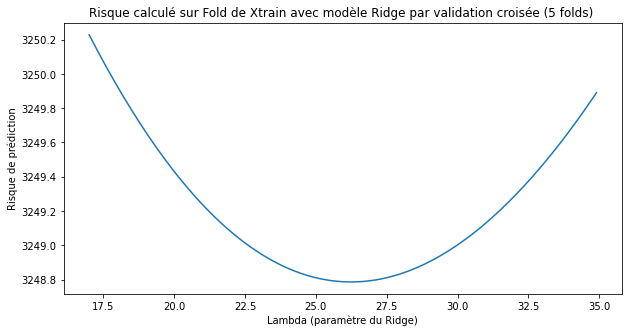

In [20]:

prediction_risk_average = []
lambdaval = np.arange(17,35,0.1)

# pour un ensemble de valeurs de lambda ...
for lambd in lambdaval:     
    
    # on initialise un ridge
    clf = Ridge(alpha=lambd,fit_intercept=True)    
    prediction_risk_all = []
    # on boucle sur les train et test générés par kfold
    for train_index, test_index in kf5.split(Xtrain_Q1011):  
        
        # on créé les tables Xtrain test et yrtain test 
        X_train = Xtrain_Q1011.iloc[train_index]             
        X_test = Xtrain_Q1011.iloc[test_index]
        y_train = ytrain.iloc[train_index]
        y_test = ytrain.iloc[test_index]
        
        # on calcule les params du ridge et on prédit sur le fold test
        prediction = clf.fit(X_train, y_train).predict(X_test)    
        
        # on déduit le risque pour une des 5 combinaisons de folds 
        risk = ((y_test - prediction).T@(y_test - prediction))/len(X_test)
        
        # on ajoute le risque dans un tableau contenant les 5 risques correspondants aux 5 folds
        prediction_risk_all.append(risk)   
        
#         print('prediction risk all = ' , prediction_risk_all)

    # calcul du risque moyen pour une valeur lambda.
    moyenne = np.mean(prediction_risk_all)
#     print('moyenne sur fold = ' , moyenne)

    # ajout du risque moyen correspondant à un lambda dans un tableau prediction_risk_average
    prediction_risk_average.append(np.mean(prediction_risk_all))
#     print(f"For lambda = {lambd}".format(lambd), " Average prediction risk on 5 folds for Xtrain is :", prediction_risk_average[-1] )


plt.figure(figsize=(10,5))
plt.plot(lambdaval,prediction_risk_average)
plt.xlabel('Lambda (paramètre du Ridge)')
plt.ylabel('Risque de prédiction')
plt.title('Risque calculé sur Fold de Xtrain avec modèle Ridge par validation croisée (5 folds) ')
plt.show()

In [21]:
# L'étape d'avant a permis de trouver lambda le paramètre optimal. On le réinjecte dans le clfRIDGE ci-dessous
# pour calculer le risque de prédiction avec les données tests non-utilisées dans le fold
clfRIDGE = Ridge(alpha=lambdaval[pd.Series(prediction_risk_average).idxmin()],fit_intercept=True)
prediction = clfRIDGE.fit(Xtrain.loc[:,features_choisies[0:10]], ytrain).predict(Xtest.loc[:,features_choisies[0:10]])
prediction_risk_RIDGE = ((ytest - prediction).T@(ytest - prediction))/len(Xtest)

print('#####################################################################################################')
print('RESULTAT POUR LE RIDGE')
print('Paramètre de régularisation optimal LAMBDA = ' , str("%.2f" % (clfRIDGE.alpha)))
print('Risque de prédiction sur échantillon test Xtest = ' , str("%.3f" % (prediction_risk_RIDGE)))
print('#####################################################################################################')


#####################################################################################################
RESULTAT POUR LE RIDGE
Paramètre de régularisation optimal LAMBDA =  26.20
Risque de prédiction sur échantillon test Xtest =  2879.183
#####################################################################################################


# Q12 

In [22]:
lambdaval2 = np.arange(2.8,2.9,0.001)
Xtrain , Xtest, ytrain , ytest = train_test_split(X,y,test_size=0.25, random_state=42)

model = LassoCV(alphas = lambdaval2, cv=5).fit(Xtrain, ytrain)
coeffs_Lasso = abs(model.coef_) 
nbre_features_Lasso = len( coeffs_Lasso[coeffs_Lasso>0.000001])
prediction = model.predict(Xtest)
prediction_risk_LASSOCV = (((ytest - prediction).T@(ytest - prediction))/len(Xtest))


print('#####################################################################################################')
print('Résultat du LASSO CV (Cross Validation de Lasso)')
print('Paramètre de régularisation optimal = ' , str("%.3f" % model.alpha_))
print('Risque de prédiction associé (sur Xtest) = ' , str("%.3f" % (prediction_risk_LASSOCV)))
print('Commentaire : ALPHA OPTIMAL pour LASSO est plus petit que pour RIDGE, ce qui est un résultat attendu')
print('#####################################################################################################')


#####################################################################################################
Résultat du LASSO CV (Cross Validation de Lasso)
Paramètre de régularisation optimal =  2.878
Risque de prédiction associé (sur Xtest) =  2715.881
Commentaire : ALPHA OPTIMAL pour LASSO est plus petit que pour RIDGE, ce qui est un résultat attendu
#####################################################################################################


# Q13

In [23]:
coeffs_Lasso = abs(model.coef_) 
nbre_features_Lasso = len( coeffs_Lasso[coeffs_Lasso>0.000001])

print('#####################################################################################################')
print('Comme Lasso fait tendre vers 0 les Theta des features éliminées, il suffit de compter le nombre de coefficients non-nuls')
print('Nombre de variables sélectionnées par Lasso : ' , nbre_features_Lasso)
print('Valeurs absolues des coefficients différents de 0 :\n ' , np.sort(coeffs_Lasso)[-10:-1])
print('#####################################################################################################')

#####################################################################################################
Comme Lasso fait tendre vers 0 les Theta des features éliminées, il suffit de compter le nombre de coefficients non-nuls
Nombre de variables sélectionnées par Lasso :  10
Valeurs absolues des coefficients différents de 0 :
  [1.69695480e-02 3.19076137e-01 1.71267952e+00 2.20276699e+00
 2.38847567e+00 5.85056233e+00 1.17791999e+01 1.51814915e+01
 1.88118064e+01]
#####################################################################################################


In [24]:
# model.alpha_
coeffs_Lasso = abs(model.coef_)
Variables_selectionnees_LASSO = np.argsort(-1*coeffs_Lasso)[0:nbre_features_Lasso]
print('#####################################################################################################')
print('Les variables sélectionnées par LASSO sont : ' , Variables_selectionnees_LASSO)
print('#####################################################################################################')

#####################################################################################################
Les variables sélectionnées par LASSO sont :  [ 85 179  28  11 121 185  70 110  62  53]
#####################################################################################################


In [25]:
# Risque de prédiction associé
XtrainQ13 = Xtrain.iloc[:,Variables_selectionnees_LASSO]
XtestQ13 = Xtest.iloc[:,Variables_selectionnees_LASSO]

prediction = LinearRegression(fit_intercept=True).fit(XtrainQ13, ytrain).predict(XtestQ13)
prediction_risk_LSLASSO = (((ytest - prediction).T@(ytest - prediction))/len(XtestQ13))
print('#####################################################################################################')
print('Risque de prédiction pour Least-Square LASSO  : ' , str("%.3f" % (prediction_risk_LSLASSO)))
print('#####################################################################################################')

#####################################################################################################
Risque de prédiction pour Least-Square LASSO  :  2739.621
#####################################################################################################


# Q14

In [26]:
print('Features choisies par forward : ' , sorted(features_choisies[0:10]))
print('Features choisies par Lasso : ' , sorted(abs(Variables_selectionnees_LASSO)))
print('Vraies features : ', sorted( [119, 121, 85, 28, 185, 149, 11, 88, 179, 155]))

Features choisies par forward :  [11, 28, 62, 85, 88, 119, 149, 155, 179, 185]
Features choisies par Lasso :  [11, 28, 53, 62, 70, 85, 110, 121, 179, 185]
Vraies features :  [11, 28, 85, 88, 119, 121, 149, 155, 179, 185]


In [27]:
print('#####################################################################################################')
print('Nombe de Variables retrouvées par forward : ' ,len(set(features_choisies[0:10])&set(sorted( [119, 121, 85, 28, 185, 149, 11, 88, 179, 155]))))
print('Nombe de Variables retrouvées par Lasso : ' ,len(set(Variables_selectionnees_LASSO)&set(sorted( [119, 121, 85, 28, 185, 149, 11, 88, 179, 155]))))
print('#####################################################################################################')


#####################################################################################################
Nombe de Variables retrouvées par forward :  9
Nombe de Variables retrouvées par Lasso :  6
#####################################################################################################


# EN RÉSUMÉ...

In [28]:

print('#####################################################################################################')
print('COMPARAISON DES RISQUES DE PREDICTION SUR ECHANTILLON TEST \n')

print('   Méthode OLS SIMPLE : ' ,str("%.3f" % (np.sum( ( ytest - results_avec_X0.predict(Xtest) ) **2 )/len(Xtest))))
print('   Méthode OLS + PCA: ' , str("%.3f" % (np.sum( ( ytest - resultsPCA_avec_X0.predict(Xtest_PCA) ) **2 )/len(Xtest))))
print('   Méthode FORWARD MODEL : ' , str("%.2f" % (RiskPred_Fwd_Var)))
print('   Méthode Least Square LASSO : Pour un ALPHA OPTIMAL = ' , str("%.2f" % model.alpha_) , ' | Risk Prediction = ' , str("%.3f" % (prediction_risk_LSLASSO)))
print('   Méthode Least Square RIDGE : Pour un ALPHA OPTIMAL = ' , str("%.1f" % clfRIDGE.alpha) ,' | Risk Prediction = ' , str("%.3f" % (prediction_risk_RIDGE)))

print('#####################################################################################################')
print('   Nombre de Variables retrouvées par forward : ' ,len(set(features_choisies[0:10])&set(sorted( [119, 121, 85, 28, 185, 149, 11, 88, 179, 155]))))
print('   Nombre de Variables retrouvées par Lasso : ' ,len(set(Variables_selectionnees_LASSO)&set(sorted( [119, 121, 85, 28, 185, 149, 11, 88, 179, 155]))))
print('#####################################################################################################')


#####################################################################################################
COMPARAISON DES RISQUES DE PREDICTION SUR ECHANTILLON TEST 

   Méthode OLS SIMPLE :  3084.973
   Méthode OLS + PCA:  5781.977
   Méthode FORWARD MODEL :  2911.78
   Méthode Least Square LASSO : Pour un ALPHA OPTIMAL =  2.88  | Risk Prediction =  2739.621
   Méthode Least Square RIDGE : Pour un ALPHA OPTIMAL =  26.2  | Risk Prediction =  2879.183
#####################################################################################################
   Nombe de Variables retrouvées par forward :  9
   Nombe de Variables retrouvées par Lasso :  6
#####################################################################################################


Nous avons pu vérifier que le Lasso avait un paramètre optimal lambda d'environ 2.88 et que LassoCV avait réussi à retrouver 6 des 10 vraies features. Le risque de prédiction associé a été (pour le Least-Square LASSO) le plus faible de tous les résultats. Par contre, il n'a pas été en mesure de retrouver toutes les vraies features.

Pour retrouver les vraies features, le test statistique aura été la méthode la plus robuste. Mais le a pris du temps à tourner (et surtout à coder !!)

En comparaison, le RIDGE aura eu un lambda optimal à 26.2 (beaucoup plus grand que Lasso). C'est normal, car le RIDGE énumère les pentes de X inutiles et les fait tendre vers 0 de manière asymptotique. Tandis que le LASSO emmène les coefficients de X inutiles vers 0 beaucoup plus rapidement.